In [1]:
import ImbalancedLearningRegression as iblr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import smogn

In [155]:
data = pd.read_csv('FireBrigadeAgent_1102153632_training_data_original.csv')

In [156]:
data.shape

(86, 12)

In [157]:
data.head()

,fieryness_x,temperature_x,brokenness_x,building_code_x,fire_index_x,extinguished_x,fieryness_y,temperature_y,brokenness_y,building_code_y,fire_index_y,extinguished_y
0,2.0,478.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,35.0,0.0,0.0,0.0,0.0,1.0,646.0,0.0,0.0,0.0,0.0
2,1.0,264.0,0.0,0.0,387.0,0.0,3.0,686.0,0.0,0.0,387.0,0.0
3,0.0,43.0,68.0,0.0,0.0,0.0,1.0,54.0,68.0,0.0,0.0,0.0
4,0.0,0.0,41.0,0.0,0.0,0.0,1.0,184.0,41.0,0.0,0.0,0.0


In [158]:
data['fieryness_x'].unique()

array([2., 0., 1., 3.])

In [159]:
# rg_mtrx = [
#     [0, 0, 0],  ## under-sample
#     [1, 1, 0],  ## over-sample
#     [2, 1, 0],  ## over-sample
#     [3, 1, 0],  ## over-sample
#     [4, 0.5, 0],  ## under-sample
#     [5, 0.5, 0],  ## under-sample
#     [6, 0.5, 0],  ## under-sample
#     [7, 0.2, 0],  ## under-sample
#     [8, 0.2, 0],  ## under-sample
# ]
rg_mtrx = [
        [0, 0, 0],  ## under-sample
        [1, 1, 0],  ## over-sample
        [2, 1, 0],  ## over-sample
        [3, 1, 0],  ## over-sample
        [4, 0, 0],  ## under-sample
        [5, 0, 0],  ## under-sample
        [6, 0, 0],  ## under-sample
        [7, 0, 0],  ## under-sample
        [8, 0, 0],  ## under-sample
    ]
data_smogn=smogn.smoter(data=data,y='fieryness_x', rel_thres=0.5, rel_method='manual',rel_ctrl_pts_rg=rg_mtrx)

r_index: 100%|#####################################################################################| 14/14 [00:00<00:00, 727.12it/s]


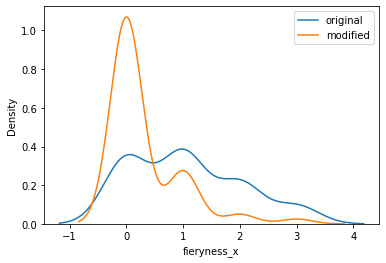

In [160]:
data_smogn = data_smogn.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
sns.kdeplot(data_smogn['fieryness_x'], label='modified')
plt.legend()

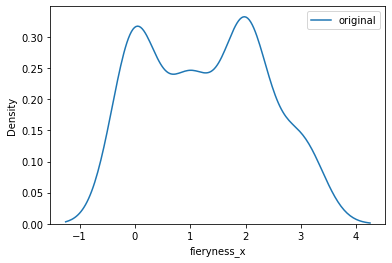

In [154]:
# data_smogn = data_smogn.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
# sns.kdeplot(data_smogn['fieryness_x'], label='modified')
plt.legend()

In [143]:
data_smogn.shape

(53, 14)

In [144]:
data.shape

(89, 12)

In [145]:
data_ro = iblr.ro(data=data,y='fieryness_x', rel_thres=0.1, rel_method='manual',rel_ctrl_pts_rg=rg_mtrx)

r_index: 100%|######################################################################################| 8/8 [00:00<00:00, 3784.19it/s]


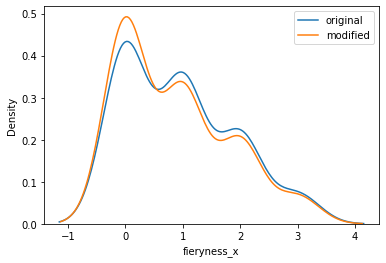

In [146]:
data_ro = data_ro.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
sns.kdeplot(data_ro['fieryness_x'], label='modified')
plt.legend()

In [128]:
data_ro.shape

(122, 13)

In [132]:
data_gn = iblr.gn(data=data,y='fieryness_x', rel_thres=0.1, rel_method='manual',rel_ctrl_pts_rg=rg_mtrx)

r_index: 100%|####################################################################################| 10/10 [00:00<00:00, 1015.84it/s]


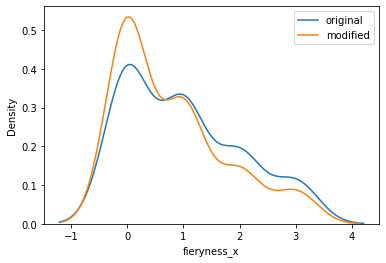

In [133]:
data_gn = data_gn.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
sns.kdeplot(data_gn['fieryness_x'], label='modified')
plt.legend()

In [99]:
data_ro.shape

(14114, 11)

In [100]:
data_gn.shape

(10080, 11)

In [101]:
data_smogn.shape

(9074, 11)

In [28]:
data_smote = iblr.smote(data=data,y='fieryness_x', rel_thres=0.5, rel_method='manual',rel_ctrl_pts_rg=rg_mtrx)

r_index: 100%|####################################################################################| 20/20 [00:00<00:00, 1332.10it/s]


<AxesSubplot:xlabel='fieryness_x', ylabel='Density'>

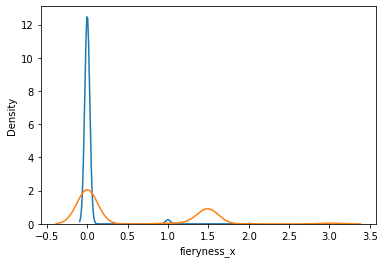

In [29]:
data_smote = data_smote.reset_index()
sns.kdeplot(data['fieryness_x'], label='original')
sns.kdeplot(data_smote['fieryness_x'], label='modified')

In [33]:
data.head()

,fieryness_x,temperature_x,brokenness_x,building_code_x,fire_index_x,extinguished_x,fieryness_y,temperature_y,brokenness_y,building_code_y,fire_index_y,extinguished_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data=pd.read_csv('env_data_combined.csv', header=None)
data.shape

(505, 500)

In [5]:
np_data = data.to_numpy()

In [6]:
np_data.shape

(505, 500)

In [8]:
np_data=np_data.reshape(-1, 5)
np_data.shape

(50500, 5)

In [9]:
df_data=pd.DataFrame(np_data, columns=['temperature', 'fieryness', 'brokenness', 'building code', 'fire index'])
df_data.head()

,temperature,fieryness,brokenness,building code,fire index
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:title={'center':'Correlation of Numeric Features'}>

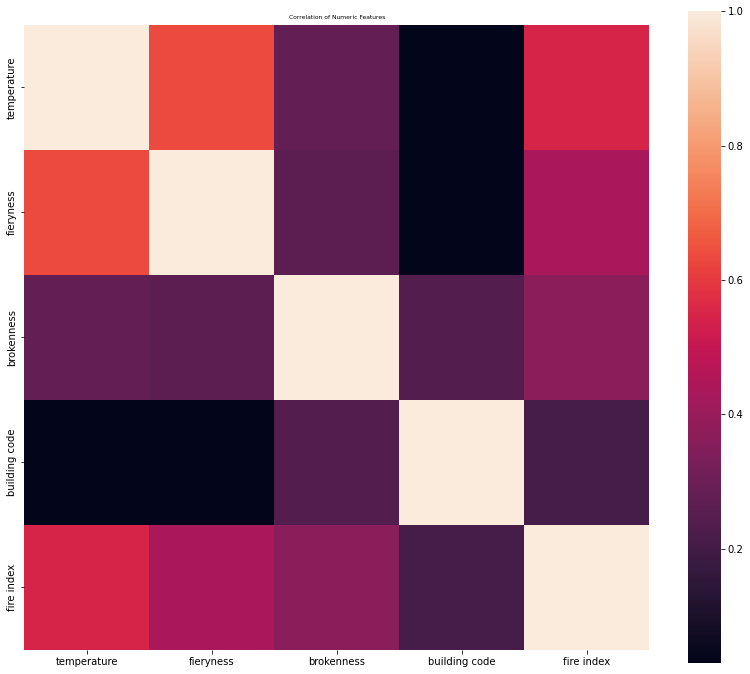

In [12]:
correlation = df_data.corr()
f,ax=plt.subplots(figsize=(14,12))
plt.title('Correlation of Numeric Features', y=1, size = 6)
sns.heatmap(correlation, square=True)

In [38]:
temps = np_data.reshape(-1, 500)[330, :]

In [39]:
temps.shape

(500,)

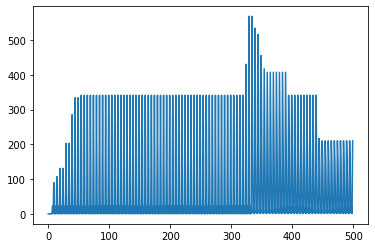

In [40]:
plt.plot(temps)

In [51]:
X= temps.reshape(-1, 5)
y=X[:, 0]

In [52]:
df=pd.DataFrame(X)
df

,0,1,2,3,4
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,22.0,1.0,90.0
2,1.0,0.0,22.0,1.0,107.0
3,2.0,0.0,22.0,1.0,131.0
4,2.0,0.0,22.0,1.0,131.0
...,...,...,...,...,...
95,146.0,3.0,22.0,1.0,210.0
96,146.0,3.0,22.0,1.0,210.0
97,146.0,3.0,22.0,1.0,210.0
98,146.0,3.0,22.0,1.0,210.0


In [48]:
y

array([  0.,   1.,   1.,   2.,   2.,   6.,   6.,  17.,  17.,  17.,  17.,
        17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,
        17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,
        17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,
        17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,
        17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,  17.,
        17., 195., 195., 195., 195., 195., 195., 195., 195., 195., 195.,
       195., 195., 195., 195., 151., 151., 151., 151., 150., 150., 150.,
       148., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146.])

In [53]:
df.shift(-1)

,0,1,2,3,4
0,1.0,0.0,22.0,1.0,90.0
1,1.0,0.0,22.0,1.0,107.0
2,2.0,0.0,22.0,1.0,131.0
3,2.0,0.0,22.0,1.0,131.0
4,6.0,0.0,22.0,1.0,203.0
...,...,...,...,...,...
95,146.0,3.0,22.0,1.0,210.0
96,146.0,3.0,22.0,1.0,210.0
97,146.0,3.0,22.0,1.0,210.0
98,146.0,3.0,22.0,1.0,210.0


<AxesSubplot:>

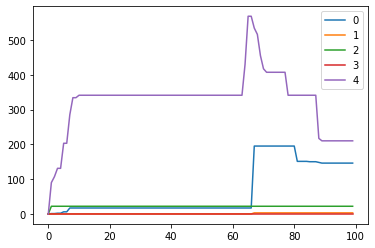

In [54]:
df.plot()

In [56]:
d=np.array([[0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.], [0.)

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1416875918.py, line 1)

<AxesSubplot:>

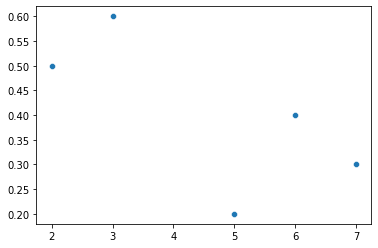

In [5]:
x = [1,2,3,4,5,6,7,8,9]
y = [None,0.5,0.6,None,0.2,0.4,0.3,None,None]
sns.scatterplot(x=x,y=y)